In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('datasets\\dengue.csv')
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [3]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [5]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [6]:
dengue['Year'] = dengue['Year'].astype('int')

In [7]:
dengue.dtypes

Month            object
Year              int32
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

<h1>10 INSIGHTS</h1>

In [13]:
# dengue['Year'].value_counts()

In [12]:
# dengue['Month'].value_counts()

In [11]:
# dengue['Region'].value_counts()

In [21]:
dengue_case = dengue.groupby(['Dengue_Cases', 'Year']).size()
dengue_case

Dengue_Cases  Year
10            2020    1
12            2020    1
13            2020    1
15            2020    1
16            2020    1
                     ..
11033         2019    1
13564         2019    1
15047         2019    1
18090         2019    1
21658         2019    1
Length: 951, dtype: int64

In [23]:
monthly_cases = dengue.groupby(['Month', 'Year'])["Dengue_Cases"].sum().reset_index()
monthly_cases

,Month,Year,Dengue_Cases
0,April,2016,7269
1,April,2017,6343
2,April,2018,6860
3,April,2019,9252
4,April,2020,2784
5,August,2016,36195
6,August,2017,25039
7,August,2018,34210
8,August,2019,85038
9,August,2020,7072


<h1>Which Year has the highest cases of dengue?</h1>

In [27]:
dengue_year = dengue['Year'].value_counts().reset_index()
dengue_year

,Year,count
0,2016,204
1,2017,204
2,2018,204
3,2019,204
4,2020,204


<Axes: title={'center': 'Yearly Cases of Dengue (2016-2020)'}, xlabel='Year'>

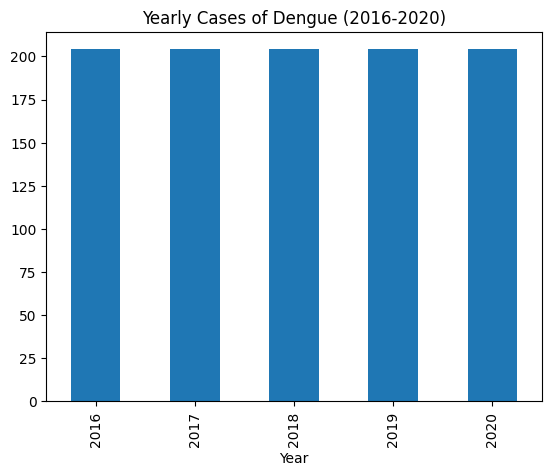

In [30]:
dengue_year = dengue['Year'].value_counts()
dengue_year.plot(
    kind='bar',
    title = 'Yearly Cases of Dengue (2016-2020)'

)

<h1>Which Region has the highest cases of dengue?</h1>

In [45]:
Regional_Death = dengue.groupby(["Region"])[['Dengue_Cases']].sum().reset_index()
Regional_Death

,Region,Dengue_Cases
0,BARMM,11537
1,CAR,30582
2,NCR,115966
3,Region I,59066
4,Region II,45141
5,Region III,131064
6,Region IV-A,163029
7,Region IV-B,30849
8,Region IX,47781
9,Region V,22167


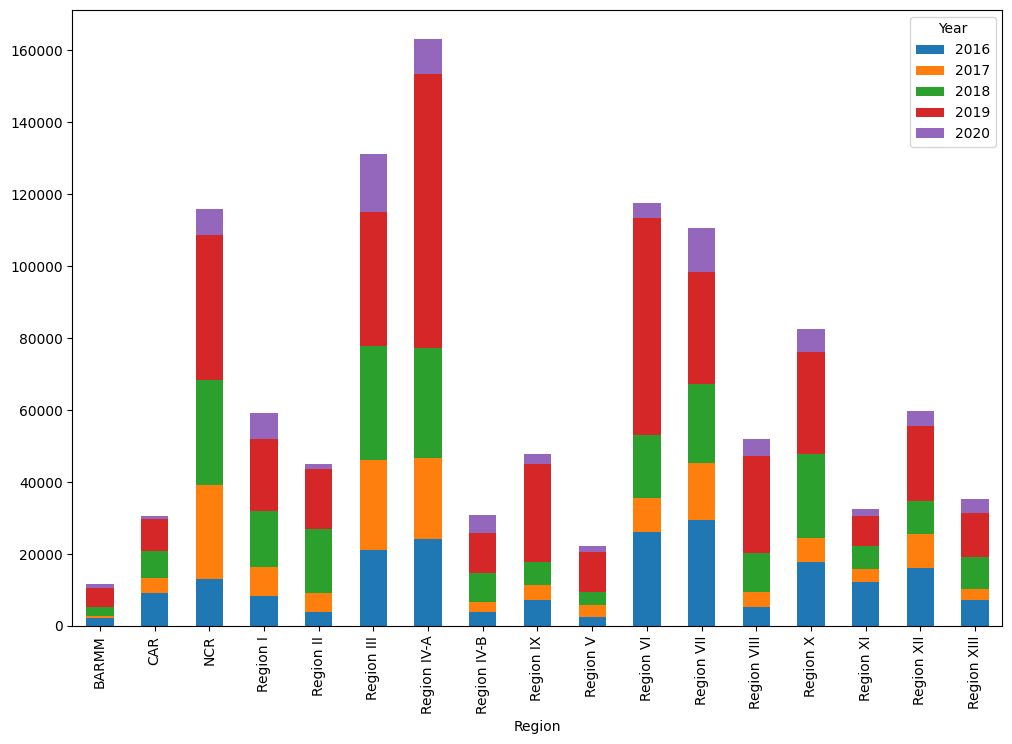

In [38]:
monthly_cases = dengue.groupby(['Region', 'Year'])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(12,8)
plt.show()

<h1>Insights: </h1>

1. The visualization shows that the region with the highest dengue case is Region IV-A(CALABARZON) with a record of 163029 cases.
2. The Region with the lowest cases of dengue is BARMM with only 11537 dengue cases recorded.
3. 

